# Event Study of Moderna
Announcement of new drug on 13 Dec 2022 7:00 am ET

In [29]:
import pandas as pd
import numpy as np
df = pd.read_csv('Moderna.csv') ### need to ensure numbers are in numbers, not general or other formats in CSV
pd.set_option('display.max_rows', None) ## prints all rows
print(df)

          Date SPX_index  Moderna_Price   SPX_Ret  MRNA_Ret
0     1-Sep-21  4,524.09     389.940002       NaN       NaN
1     2-Sep-21  4,536.95     397.660004  0.002839  0.019604
2     3-Sep-21  4,535.43     416.700012 -0.000335  0.046769
3     7-Sep-21  4,520.03     436.390015 -0.003401  0.046170
4     8-Sep-21  4,514.07     422.899994 -0.001319 -0.031401
5     9-Sep-21  4,493.28     455.920013 -0.004616  0.075182
6    10-Sep-21  4,458.58     449.380005 -0.007753 -0.014449
7    13-Sep-21  4,468.73     419.720001  0.002274 -0.068281
8    14-Sep-21  4,443.05     427.709991 -0.005763  0.018858
9    15-Sep-21  4,480.70     434.459991  0.008438  0.015658
10   16-Sep-21  4,473.75     440.649994 -0.001552  0.014147
11   17-Sep-21  4,432.99     430.049988 -0.009153 -0.024349
12   20-Sep-21  4,357.73     423.329987 -0.017123 -0.015749
13   21-Sep-21  4,354.19     434.040009 -0.000813  0.024985
14   22-Sep-21  4,395.64     440.720001  0.009475  0.015273
15   23-Sep-21  4,448.98     454.600006 

Data collected do not contain weekend prices that are same as Friday closing. Returns are continuously compounded.

Selecting only rows from -250 days to -11 (inclusive) trading days from event date of 13 Dec 2022 (event day 0) for Estimation Period

In [2]:
df1=df.copy()
df2=df1.iloc[73:313,]
print(df2)

          Date SPX_index  Moderna_Price   SPX_Ret  MRNA_Ret
73   15-Dec-21  4,709.85     283.279999  0.016216  0.021841
74   16-Dec-21  4,668.67     282.019989 -0.008782 -0.004458
75   17-Dec-21  4,620.64     294.799988 -0.010341  0.044319
76   20-Dec-21  4,568.02     276.380005 -0.011453 -0.064520
77   21-Dec-21  4,649.23     268.140015  0.017622 -0.030267
..         ...       ...            ...       ...       ...
308  21-Nov-22  3,949.94     176.750000 -0.003891 -0.027015
309  22-Nov-22  4,003.58     179.589996  0.013489  0.015940
310  23-Nov-22  4,027.26     176.809998  0.005897 -0.015601
311  25-Nov-22  4,026.12     176.399994 -0.000283 -0.002322
312  28-Nov-22  3,963.94     175.380005 -0.015565 -0.005799

[240 rows x 5 columns]


# Using Market Model as Benchmark

In [3]:
import statsmodels.api as sm
X2 = df2['SPX_Ret']
Y2 = df2['MRNA_Ret']
Z2 = sm.add_constant(X2)
model = sm.OLS(Y2, Z2).fit()
predictions = model.predict(Z2) 

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:               MRNA_Ret   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     96.14
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.78e-19
Time:                        12:38:38   Log-Likelihood:                 452.17
No. Observations:                 240   AIC:                            -900.3
Df Residuals:                     238   BIC:                            -893.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.002     -0.381      0.7

The warning is letting you know that currently, you're fine to write pd.concat(dfs, self._concat_axis), but that they're planning on changing the definition of the function in a future version of pandas so that all arguments except for objs will be keyword-only. I.e., after they make this change, pd.concat(dfs, self._concat_axis) will raise an error, and you will have to write pd.concat(dfs, axis=self._concat_axis) instead. They are most likely considering making this change because calling functions with keyword arguments is often clearer and more readable for other people.

In [4]:
df3=df.iloc[313:334,]
print(df3,len(df3))

          Date SPX_index  Moderna_Price   SPX_Ret  MRNA_Ret
313  29-Nov-22  3,957.63     173.149994 -0.001593 -0.012797
314  30-Nov-22  4,080.11     175.910004  0.030479  0.015814
315   1-Dec-22  4,076.57     181.479996 -0.000868  0.031173
316   2-Dec-22  4,071.70     182.350006 -0.001195  0.004783
317   5-Dec-22  3,998.84     175.929993 -0.018056 -0.035842
318   6-Dec-22  3,941.26     173.539993 -0.014504 -0.013678
319   7-Dec-22  3,933.92     179.000000 -0.001864  0.030978
320   8-Dec-22  3,963.51     184.699997  0.007494  0.031347
321   9-Dec-22  3,934.38     177.350006 -0.007377 -0.040608
322  12-Dec-22  3,990.56     165.130005  0.014178 -0.071392
323  13-Dec-22  4,019.65     197.539993  0.007263  0.179208
324  14-Dec-22  3,995.32     208.949997 -0.006071  0.056154
325  15-Dec-22  3,895.75     207.250000 -0.025237 -0.008169
326  16-Dec-22  3,852.36     193.289993 -0.011200 -0.069734
327  19-Dec-22  3,817.66     189.889999 -0.009048 -0.017747
328  20-Dec-22  3,821.62     201.160004 

In [5]:
X3 = df3['SPX_Ret']
Y3 = df3['MRNA_Ret']

C=model.params   ### C[0] gives intercept estimate; C[1] gives slope estimate
### Compute Abnormal Return AR
AR = Y3 - C[0] - C[1]*X3
print(AR)

313   -0.009445
314   -0.030026
315    0.033413
316    0.007525
317   -0.007238
318    0.009477
319    0.034745
320    0.020762
321   -0.028385
322   -0.092230
323    0.168976
324    0.066375
325    0.031449
326   -0.051646
327   -0.002960
328    0.056974
329    0.021469
330    0.015110
331   -0.053530
332   -0.092673
333   -0.001122
dtype: float64


Plot Abnormal Return Graph for -10 to +10 trading days 

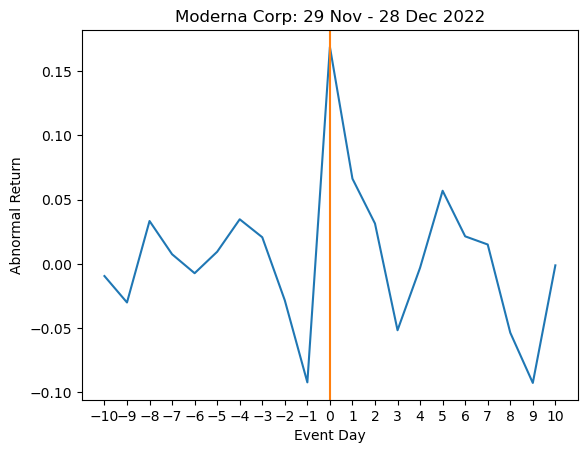

In [6]:
time = range(-10,11,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, AR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-1, 1), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Abnormal Return')
  
# giving a title to my graph
plt.title('Moderna Corp: 29 Nov - 28 Dec 2022')
  
# function to show the plot
plt.show()

In [7]:
CAR = AR.cumsum()
print(CAR)

313   -0.009445
314   -0.039470
315   -0.006058
316    0.001467
317   -0.005771
318    0.003705
319    0.038451
320    0.059213
321    0.030828
322   -0.061402
323    0.107574
324    0.173948
325    0.205397
326    0.153751
327    0.150791
328    0.207765
329    0.229234
330    0.244344
331    0.190814
332    0.098140
333    0.097018
dtype: float64


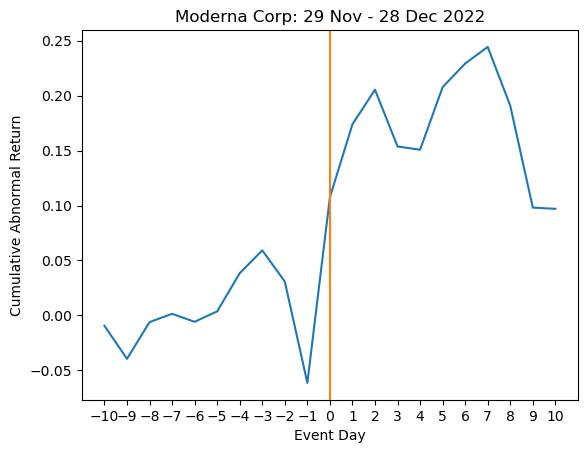

In [8]:
time = list(range(-10,11,1))  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, CAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-1, 1), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Cumulative Abnormal Return')
  
# giving a title to my graph
plt.title('Moderna Corp: 29 Nov - 28 Dec 2022')
  
# function to show the plot
plt.show()

In [9]:
sigma=np.sqrt(model.mse_resid)  ### note model.mse_resid gives the unbiased version
print(sigma)

0.03692723173932102


In [10]:
t_stat_AR=AR/sigma
print(t_stat_AR)

313   -0.255766
314   -0.813102
315    0.904829
316    0.203766
317   -0.196014
318    0.256632
319    0.940917
320    0.562236
321   -0.768664
322   -2.497625
323    4.575920
324    1.797441
325    0.851646
326   -1.398602
327   -0.080150
328    1.542874
329    0.581386
330    0.409180
331   -1.449613
332   -2.509622
333   -0.030392
dtype: float64


In [11]:
sd=np.sqrt(range(1,22,1)*(sigma**2))
print(sd)

[0.03692723 0.05222299 0.06395984 0.07385446 0.0825718  0.09045288
 0.09770027 0.10444598 0.1107817  0.11677416 0.12247377 0.12791968
 0.13314303 0.13816905 0.14301855 0.14770893 0.15225488 0.15666898
 0.16096207 0.1651436  0.16922183]


In [12]:
t_stat_CAR=(CAR/sd)
print(t_stat_CAR)
### some rounding errors

313   -0.255766
314   -0.755804
315   -0.094708
316    0.019864
317   -0.069894
318    0.040965
319    0.393560
320    0.566922
321    0.278278
322   -0.525821
323    0.878341
324    1.359824
325    1.542681
326    1.112773
327    1.054346
328    1.406584
329    1.505594
330    1.559619
331    1.185458
332    0.594272
333    0.573319
dtype: float64


# Using Market-Adjusted Return as Benchmark

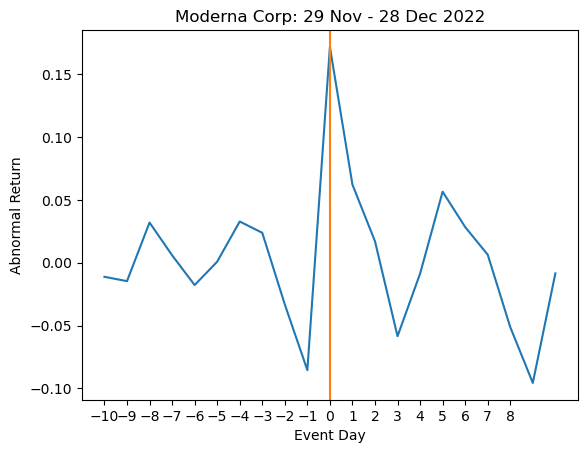

In [13]:
MAR=Y3-X3

time = range(-10,11,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, MAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-1, 1), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Abnormal Return')
  
# giving a title to my graph
plt.title('Moderna Corp: 29 Nov - 28 Dec 2022')
  
# function to show the plot
plt.show()

In [14]:
sd2=np.std(Y2-X2)
t_stat_MAR=MAR/sd2
print(t_stat_MAR)

313   -0.297481
314   -0.389367
315    0.850750
316    0.158724
317   -0.472241
318    0.021926
319    0.872016
320    0.633357
321   -0.882349
322   -2.272066
323    4.565477
324    1.652200
325    0.453197
326   -1.554193
327   -0.230960
328    1.503346
329    0.755105
330    0.170743
331   -1.362529
332   -2.542304
333   -0.225334
dtype: float64


# Using Mean-Adjusted Return as Benchmark

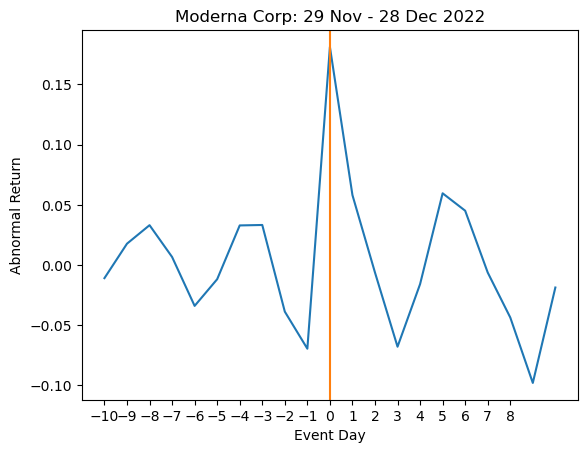

In [15]:
MeAR=Y3-np.mean(Y2)
time = range(-10,11,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, MeAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-1, 1), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Abnormal Return')
  
# giving a title to my graph
plt.title('Moderna Corp: 29 Nov - 28 Dec 2022')
  
# function to show the plot
plt.show()

In [16]:
sd3=np.std(Y2-np.mean(Y2))
t_stat_MeAR=MeAR/sd3
print(t_stat_MeAR)

313   -0.249932
314    0.406710
315    0.759199
316    0.153524
317   -0.778827
318   -0.270157
319    0.754720
320    0.763196
321   -0.888206
322   -1.594728
323    4.156690
324    1.332528
325   -0.143725
326   -1.556677
327   -0.363533
328    1.366994
329    1.035167
330   -0.142748
331   -0.999675
332   -2.246841
333   -0.428559
Name: MRNA_Ret, dtype: float64


# Plotting Standardized Abnormal Returns of 3 Benchmarks

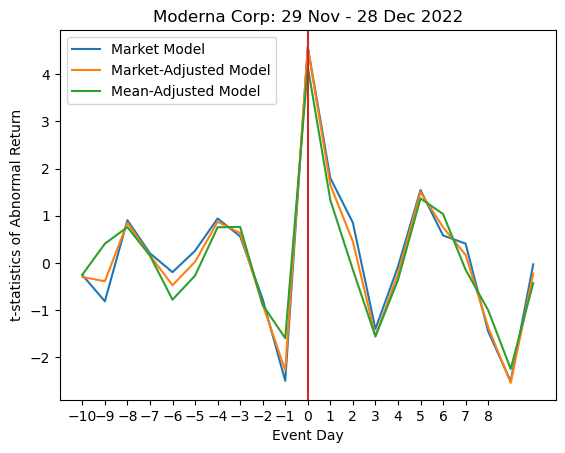

In [17]:
time = range(-10,11,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 

plt.plot(time, t_stat_AR)
plt.plot(time, t_stat_MAR)
plt.plot(time, t_stat_MeAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-12, 6), scaley = False)

plt.legend(['Market Model', 'Market-Adjusted Model', 'Mean-Adjusted Model'], loc="upper left")

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('t-statistics of Abnormal Return')
  
# giving a title to my graph
plt.title('Moderna Corp: 29 Nov - 28 Dec 2022')
  
# function to show the plot
plt.show()

In [18]:
### There was semi-strong mkt info eff in the news on 13 Dec on the cancer drug. 
### But prior to that Moderna stock prices yo-yo due to ongoing uncertainties in its prospect on Covid-19 vacinnation. 
### The week prior to 13 Dec, Moderna prices actually falls, so this causes the cumulative CAR to be insignificant by event day 0. 
###    This does not negate the primary conclusion on the 13 Dec news info eff based on abnormal return. 
### Semi-strong info eff implies weak-form mkt eff.
### There is no run-up in returns before event day 0 implies there is no leakage of private info. If mkt is strong-form eff
###    then there would be use of private info and prices would have adjusted earlier than event day 0. Thus mkt is not
###    strong-form eff in this case.

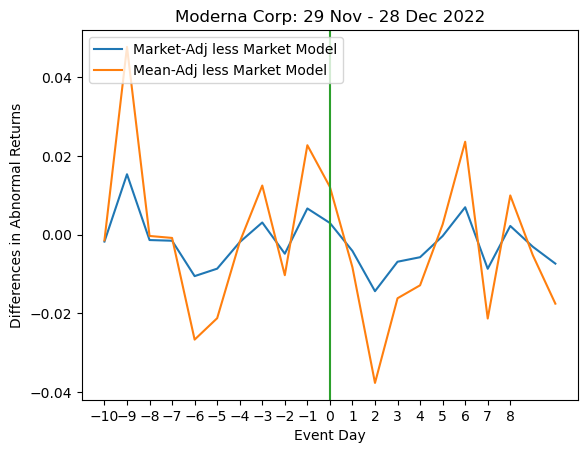

In [36]:
time = range(-10,11,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 

plt.plot(time, MAR-AR)
plt.plot(time, MeAR-AR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-12, 6), scaley = False)

plt.legend(['Market-Adj less Market Model', 'Mean-Adj less Market Model'], loc="upper left")

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Differences in Abnormal Returns')
  
# giving a title to my graph
plt.title('Moderna Corp: 29 Nov - 28 Dec 2022')
  
# function to show the plot
plt.show()